<a href="https://colab.research.google.com/github/lisamarieholz/MachineLearning/blob/main/Decision_Tree_Visa_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the US Perminent Visas using zip extractor

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/ECON441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

Exception ignored in: <function ZipFile.__del__ at 0x7f04b1726700>
Traceback (most recent call last):
  File "/usr/lib/python3.8/zipfile.py", line 1821, in __del__
  File "/usr/lib/python3.8/zipfile.py", line 1843, in close
  File "/usr/lib/python3.8/zipfile.py", line 1953, in _fpclose
OSError: [Errno 107] Transport endpoint is not connected
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)

# 2.) Choose 4 features you think are important. Case_status is your target variable


Using a loop to find the features with lowest percent NA:

In [ ]:
dictionary = []

for i in df.columns:
    missing = round((df[i].isnull().sum()/len(df)),3)
    dictionary.append({'column_name': i, 'percentage missing': missing})
    
missing = pd.DataFrame(dictionary)


missing = missing.sort_values(by='percentage missing')


missing.head(25)

,column_name,percentage missing
76,job_info_work_city,0.000
23,employer_state,0.000
22,employer_postal_code,0.000
18,employer_name,0.000
15,employer_city,0.000
13,employer_address_1,0.000
12,decision_date,0.000
8,case_status,0.000
78,job_info_work_state,0.000
97,pw_soc_code,0.001


In [ ]:
df['case_status'].value_counts()

Certified            181933
Certified-Expired    148586
Denied                25649
Withdrawn             18194
Name: case_status, dtype: int64

In [ ]:
df['foreign_worker_info_education'].value_counts()

Master's       103662
Bachelor's      87686
None            18344
Doctorate       12243
Other           10245
High School      4536
Associate's      2337
Name: foreign_worker_info_education, dtype: int64

Selecting features and dropping NAs:

In [ ]:
df_select = df[["case_status", "employer_state", "employer_yr_estab", "country_of_citizenship", "foreign_worker_info_education"]].dropna()
df_select.head()

,case_status,employer_state,employer_yr_estab,country_of_citizenship,foreign_worker_info_education
135269,Certified,WISCONSIN,1959.0,INDIA,Bachelor's
135270,Denied,MISSISSIPPI,1988.0,SOUTH KOREA,None
135271,Denied,COLORADO,1996.0,GERMANY,Doctorate
135272,Certified,WASHINGTON,2010.0,SOUTH KOREA,Master's
135273,Denied,MISSISSIPPI,1988.0,SOUTH KOREA,None


In [ ]:
df_select.shape

(238904, 5)

# 3.) Clean your data for a decision tree


In [ ]:
X = pd.get_dummies(df_select, columns=["employer_state", "country_of_citizenship", "foreign_worker_info_education"]).drop('case_status',axis=1)
y = df_select["case_status"]

In [ ]:
X['employer_yr_estab'] #confirming year is in X

135269    1959.0
135270    1988.0
135271    1996.0
135272    2010.0
135273    1988.0
           ...  
374357    2014.0
374358    1975.0
374359    2010.0
374360    2013.0
374361    1968.0
Name: employer_yr_estab, Length: 238904, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# 4.) Fit and plot a decision tree of depth 3


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

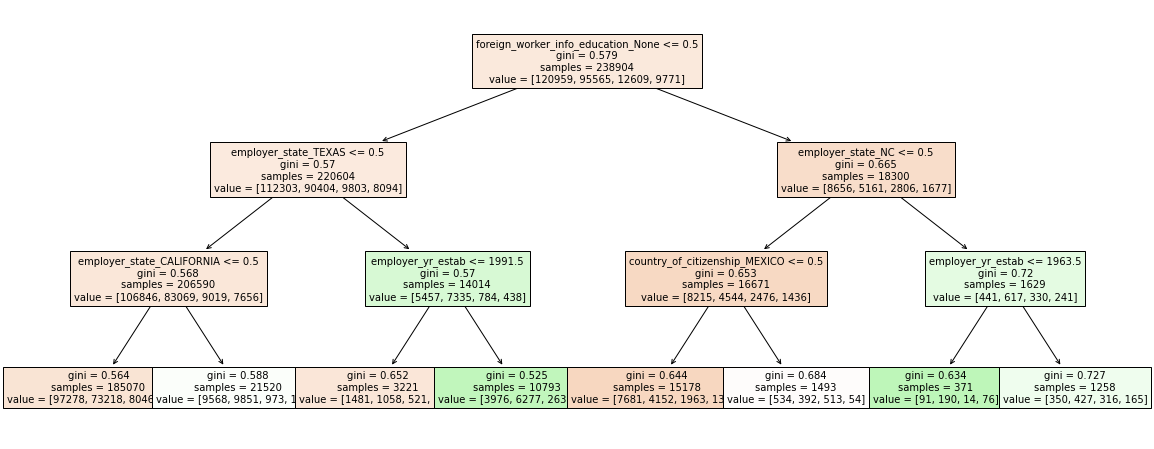

In [ ]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf,feature_names = X.columns, filled=True, fontsize=10 )
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix, accuracy_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
preds = clf.predict(X_test)
print(classification_report(y_test,preds))

                   precision    recall  f1-score   support

        Certified       0.52      0.88      0.66     24183
Certified-Expired       0.50      0.18      0.26     19117
           Denied       0.00      0.00      0.00      2509
        Withdrawn       0.00      0.00      0.00      1972

         accuracy                           0.52     47781
        macro avg       0.25      0.27      0.23     47781
     weighted avg       0.46      0.52      0.44     47781



In [ ]:
clf.score(X_test, y_test)

0.518909189845336

# 5.) Write your interpretation of the largest (by sample size) leaf node


In [ ]:
185070/len(X)

0.7746626259920303

77% of our data is in this class with a GINI score of .56 which is high. This means that the observations are not homogenous in this class which includes employees with some level of education applying for a visa to work for an employer in California.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

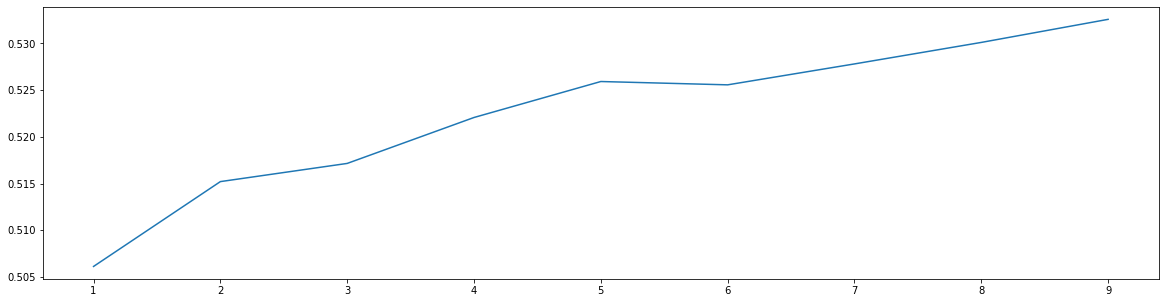

In [ ]:
acc = []

for i in range(1,10):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train,y_train)
    score = tree.score(X_test, y_test)
    acc.append(score)


plt.plot(range(1,10), acc)
plt.show()

The best depth for the range tested would be 9. 